In [1]:
import torch, torchvision
import torchvision.transforms as transforms
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
res18 = torchvision.models.resnet18(pretrained=True).eval()
res34 = torchvision.models.resnet50(pretrained=True).eval()

In [12]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.m1 = res18
        self.m2 = res34
    def forward(self, x):
        return (self.m1(x)+self.m2(x))/2

model = Model()

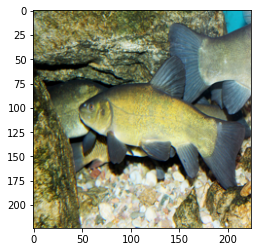

In [14]:
def init_im(path):
    im = Image.open(path).convert("RGB").resize((224,224))
    data = transform(im).unsqueeze(dim=0)
    data.requires_grad=True
    return data

im = Image.open("tench.jpg").convert("RGB").resize((224,224))
plt.imshow(im)
transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

def invers_transform(data):
    transform = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])
    im = transform(data.data.squeeze()).numpy().transpose((1,2,0))*255
    return im.astype(np.uint8)
    

data = init_im("tench.jpg")

label =  0


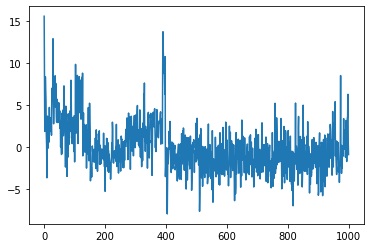

In [22]:
y = res18(data)
p = torch.nn.functional.softmax(y.detach(), dim=1)
label = y.argmax(dim=1)
print("label = ", label.item())
loss = torch.nn.functional.cross_entropy(y, label)
plt.plot(y.squeeze().detach().numpy())

In [28]:
imgs = []
data = init_im("tench.jpg")

for i in range(10):
    y = model(data)
    loss = torch.nn.functional.cross_entropy(y, label)
    print("loss=%f"%loss.item())
    print("prediction correct or not: ", y.argmax()==label)
    loss.backward()
    # apply attacking
    data.data += data.grad/10
    data.grad.zero_()
    imgs.append(invers_transform(data.data))

loss=0.018046
prediction correct or not:  tensor([True])
loss=0.018657
prediction correct or not:  tensor([True])
loss=0.019322
prediction correct or not:  tensor([True])
loss=0.020040
prediction correct or not:  tensor([True])
loss=0.020812
prediction correct or not:  tensor([True])
loss=0.021641
prediction correct or not:  tensor([True])
loss=0.022527
prediction correct or not:  tensor([True])
loss=0.023494
prediction correct or not:  tensor([True])
loss=0.024565
prediction correct or not:  tensor([True])
loss=0.025737
prediction correct or not:  tensor([True])


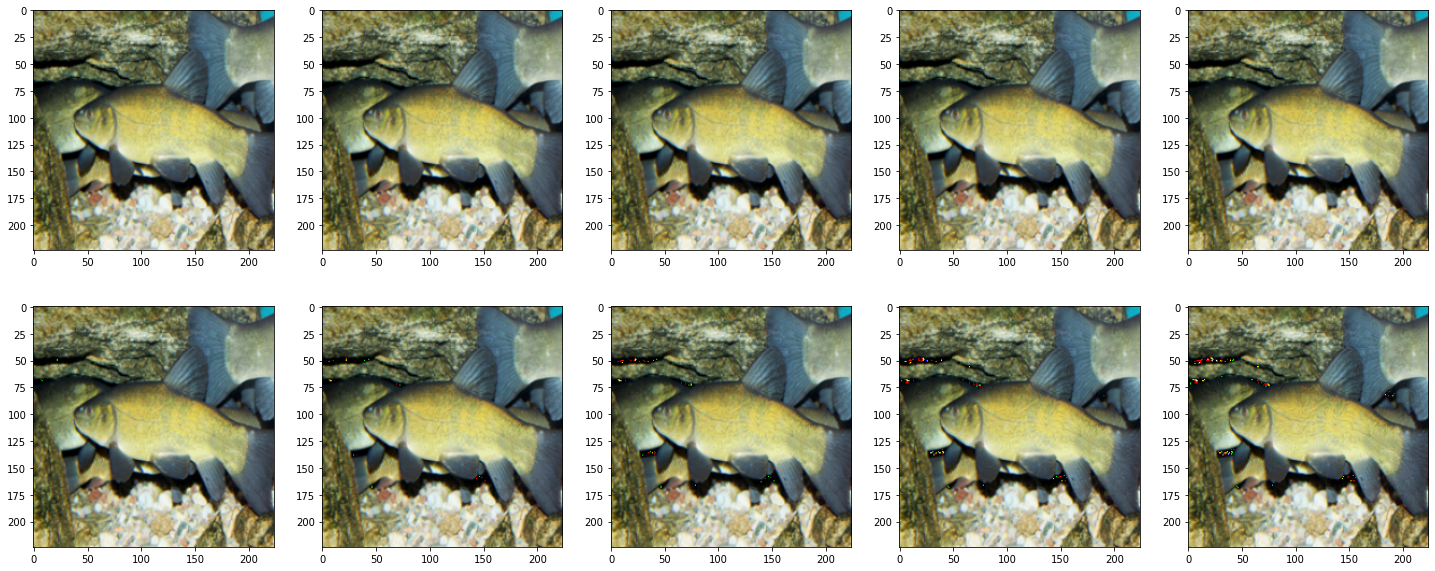

In [17]:
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))

for w in range(cols):
    for h in range(rows):
        idx = h*cols+w
        axes[h, w].imshow(imgs[idx])

In [27]:
imgs = []
data = init_im("tench.jpg")

for i in range(10):
    y = res18(data)
    loss = torch.nn.functional.cross_entropy(y, label)
    print("loss=%f"%loss.item())
    print("prediction correct or not: ", y.argmax()==label)
    loss.backward()
    # apply attacking
    data.data += data.grad/10
    data.grad.zero_()

    imgs.append(invers_transform(data.data))

loss=0.169372
prediction correct or not:  tensor([True])
loss=0.299501
prediction correct or not:  tensor([True])
loss=0.697671
prediction correct or not:  tensor([True])
loss=1.932722
prediction correct or not:  tensor([False])
loss=4.271549
prediction correct or not:  tensor([False])
loss=6.897850
prediction correct or not:  tensor([False])
loss=9.427464
prediction correct or not:  tensor([False])
loss=11.889653
prediction correct or not:  tensor([False])
loss=14.070395
prediction correct or not:  tensor([False])
loss=16.026133
prediction correct or not:  tensor([False])
